<a href="https://colab.research.google.com/github/navyajammalamadaka/COVID-19-SHIPPING/blob/main/Copy_of_04_01_2023_submission_Advanced_Project_Spring_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ECE-GY-9953 ADVANCED PROJECT I, Section BK32

Date of Submission: 04/01/2023

# Team Members:

  Navya Sravani Jammalamadaka – nsj9072

  Rahul Rathod – rr4080


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Part 1: Plan Benefits Across States and Identifying top benefits.

Step 1: Installing libraries and Dependencies

In [ ]:
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Step 2: Setting Up Spark Environment

In [ ]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 22.5 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.2-py2.py3-none-any.whl size=281824028 sha256=4b7213a39ee82d25b5c370d105772cc77dc995dfd6695be0816cc31b6b195ca0
  Stored in directory: /root/.cache/pip/wheels/6c/e3/9b/0525ce8a69478916513509d43693511463c6468db0de237c86
Successfully built pyspark
  Attempting uninstall: py4j
    Found existing installation: py4j 0.10.9.7
    Uninstalling py4j-0.10.9.7:
      Successfully uninstalled py4j-0.10.9.7


In [ ]:
import pyspark
from pyspark.sql.functions import *
from pyspark.sql.types import StructType,StructField, StringType, FloatType, IntegerType
from pyspark.sql.window import Window

In [ ]:
spark = pyspark.sql.SparkSession.builder\
        .master('local[*]')\
        .appName('Health insurance_analysis')\
        .getOrCreate()

In [ ]:
import pandas as pd
pd.set_option('display.max_rows',10)

In [ ]:
benefit = spark.read.option("header",True) \
.option("inferSchema", True) \
.csv("/content/drive/MyDrive/Adv Project/output_bcs.csv")


In [ ]:
#Let us try to find out the count of each health insurance benefit per year
benefit.createOrReplaceTempView ("Benefits")
benefits_per_year = spark.sql("SELECT BenefitName, BusinessYear, count(BenefitName) as count from Benefits GROUP BY BenefitName, BusinessYear")
benefits_per_year.show(5)

+--------------------+------------+-----+
|         BenefitName|BusinessYear|count|
+--------------------+------------+-----+
|Fitness Center Me...|        2021|   88|
|  Immediate Dentures|        2021|   23|
|Substance Abuse D...|        2021|18676|
|Root Canal Therap...|        2021|   23|
| Tissue Conditioning|        2021|   20|
+--------------------+------------+-----+
only showing top 5 rows



In [ ]:
benefits_per_year.createOrReplaceTempView ("benefits_per_year")

#Find out the top 5 health insurance benefits availed in the year 2023
benefits_2023 = spark.sql("SELECT BenefitName, count from benefits_per_year Where BusinessYear='2023' ORDER BY count DESC")
benefits_2023.show(5)

+--------------------+-----+
|         BenefitName|count|
+--------------------+-----+
|Dental Check-Up f...|32528|
|Major Dental Care...|32528|
| Orthodontia - Adult|32528|
| Orthodontia - Child|32528|
|Major Dental Care...|32528|
+--------------------+-----+
only showing top 5 rows



In [ ]:
#Find out the top 5 benefits in the year 2022

benefits_2022 = spark.sql("SELECT BenefitName, count from benefits_per_year where BusinessYear = '2022' ORDER BY count DESC")
benefits_2022.show(5)

+--------------------+-----+
|         BenefitName|count|
+--------------------+-----+
|   Accidental Dental|27817|
|Dental Check-Up f...|27817|
| Orthodontia - Child|27817|
|Basic Dental Care...|27817|
|Major Dental Care...|27817|
+--------------------+-----+
only showing top 5 rows



In [ ]:
#Find out the top 5 benefits in the year 2021

benefits_2021 = spark.sql("SELECT BenefitName, count from benefits_per_year where BusinessYear = '2021' ORDER BY count DESC")
benefits_2021.show(5)

+--------------------+-----+
|         BenefitName|count|
+--------------------+-----+
|Basic Dental Care...|20236|
| Orthodontia - Child|20236|
|Routine Dental Se...|20236|
|Dental Check-Up f...|20236|
|Major Dental Care...|20236|
+--------------------+-----+
only showing top 5 rows



In [ ]:
#Next we want to find out which is the benefit that is most needed per state
#Let us first explore the list of distinct states
#We need to find for each state code, which is the maximum benefit name

states = benefit.select('StateCode').filter(benefit.StateCode != "None").distinct().collect()
states

[Row(StateCode='AZ'),
 Row(StateCode='SC'),
 Row(StateCode='LA'),
 Row(StateCode='NC'),
 Row(StateCode='MO'),
 Row(StateCode='ND'),
 Row(StateCode='MS'),
 Row(StateCode='AL'),
 Row(StateCode='IN'),
 Row(StateCode='GA'),
 Row(StateCode='FL'),
 Row(StateCode='AK'),
 Row(StateCode='OK'),
 Row(StateCode='WY'),
 Row(StateCode='KY'),
 Row(StateCode='WI'),
 Row(StateCode='DE'),
 Row(StateCode='IL'),
 Row(StateCode='TN'),
 Row(StateCode='IA'),
 Row(StateCode='TX'),
 Row(StateCode='KS'),
 Row(StateCode='AR'),
 Row(StateCode='HI'),
 Row(StateCode='OR'),
 Row(StateCode='VA'),
 Row(StateCode='NH'),
 Row(StateCode='MI'),
 Row(StateCode='NE'),
 Row(StateCode='MT'),
 Row(StateCode='ME'),
 Row(StateCode='OH'),
 Row(StateCode='NM'),
 Row(StateCode='SD'),
 Row(StateCode='WV'),
 Row(StateCode='UT')]

In [ ]:
#From above, we can see that the states contain some values with numbers as well as some wrong values like 
#HIOS-which is an insurance source name and not a state code. We need to filter these out

benefits_per_state_c = spark.sql("SELECT * from Benefits WHERE StateCode != 'None' and StateCode REGEXP '^[A-Z]' and CHAR_LENGTH(StateCode) == 2")
benefits_per_state_c= benefits_per_state_c.filter(col("StateCode")!='No')
benefits_per_state_c.createOrReplaceTempView ("benefits_per_state_c")


In [ ]:
#Let us understand which benefit name is used most by the population of each state
#For this we can group by statecode
#we get the benefit names and their count per state

benefits_per_state = spark.sql("SELECT StateCode, BenefitName, count(BenefitName) as count from benefits_per_state_c GROUP BY BenefitName, StateCode")
benefits_per_state.show(60)

+---------+--------------------+-----+
|StateCode|         BenefitName|count|
+---------+--------------------+-----+
|       AZ|     Specialty Drugs| 3495|
|       FL|Nutritional Couns...| 6944|
|       GA|Dental Check-Up f...| 4319|
|       LA|Preventive Care/S...| 1503|
|       LA|Rehabilitative Oc...| 1503|
|       LA|    Infusion Therapy| 1503|
|       MO|Periodontal Root ...|    8|
|       ND|   Routine Foot Care|  631|
|       OK|Preferred Brand D...| 2207|
|       AL|Inpatient Physici...|  480|
|       GA|Recementation of ...|    4|
|       NC|        Chemotherapy| 4432|
|       ND|Private-Duty Nursing|  631|
|       OK|   Chiropractic Care| 2207|
|       MO|Primary Care Visi...| 2669|
|       ND|        Chemotherapy|  631|
|       ND|Rehabilitative Oc...|  631|
|       AZ|        Hearing Aids| 3495|
|       FL|    Hospice Services| 6944|
|       GA|             Filings|    4|
|       ND|Laboratory Outpat...|  631|
|       OK|            Dialysis| 2207|
|       FL|Diabetes Care 

In [ ]:
#From the above we can see that for state AZ the count of the benefits is 3495, so 3495 people have 
#opted for an insurance plan which provides the benefit of Specialty Drugs
#How can we find out which benefit name in state AZ was availed the most?
#And similarly find out the most frequent benefit used in each state?
#We will do this in the later sections of the notebook

In [ ]:
#Next let us try to find out the which state uses the maximum number of benefits
#This would tell us which state has a large number of people who avail insurance benefits
#Total frequency of benefits used per state
benefits_per_state.createOrReplaceTempView ("benefits_per_state")
tot_benefits = spark.sql("SELECT StateCode, sum(count) as tot_benefits from benefits_per_state GROUP BY StateCode")
tot_benefits.show(60)

+---------+------------+
|StateCode|tot_benefits|
+---------+------------+
|       AZ|      248655|
|       SC|       99142|
|       LA|      112875|
|       OR|       91462|
|       VA|      139212|
|       WY|       23357|
|       KY|       13434|
|       NH|       79617|
|       MI|      195631|
|       WI|      430068|
|       NE|      108640|
|       MT|       79159|
|       NC|      313341|
|       DE|       18919|
|       MO|      192205|
|       IL|      290347|
|       ME|       21118|
|       ND|       43412|
|       MS|       63065|
|       AL|       34944|
|       IN|       72903|
|       OH|      324651|
|       TN|      250254|
|       IA|       61567|
|       NM|       22580|
|       SD|       41372|
|       TX|      742182|
|       WV|       24700|
|       GA|      299336|
|       KS|      124430|
|       FL|      506084|
|       AK|       11737|
|       AR|       70301|
|       OK|      152993|
|       UT|       94229|
|       HI|       18972|
+---------+------------+


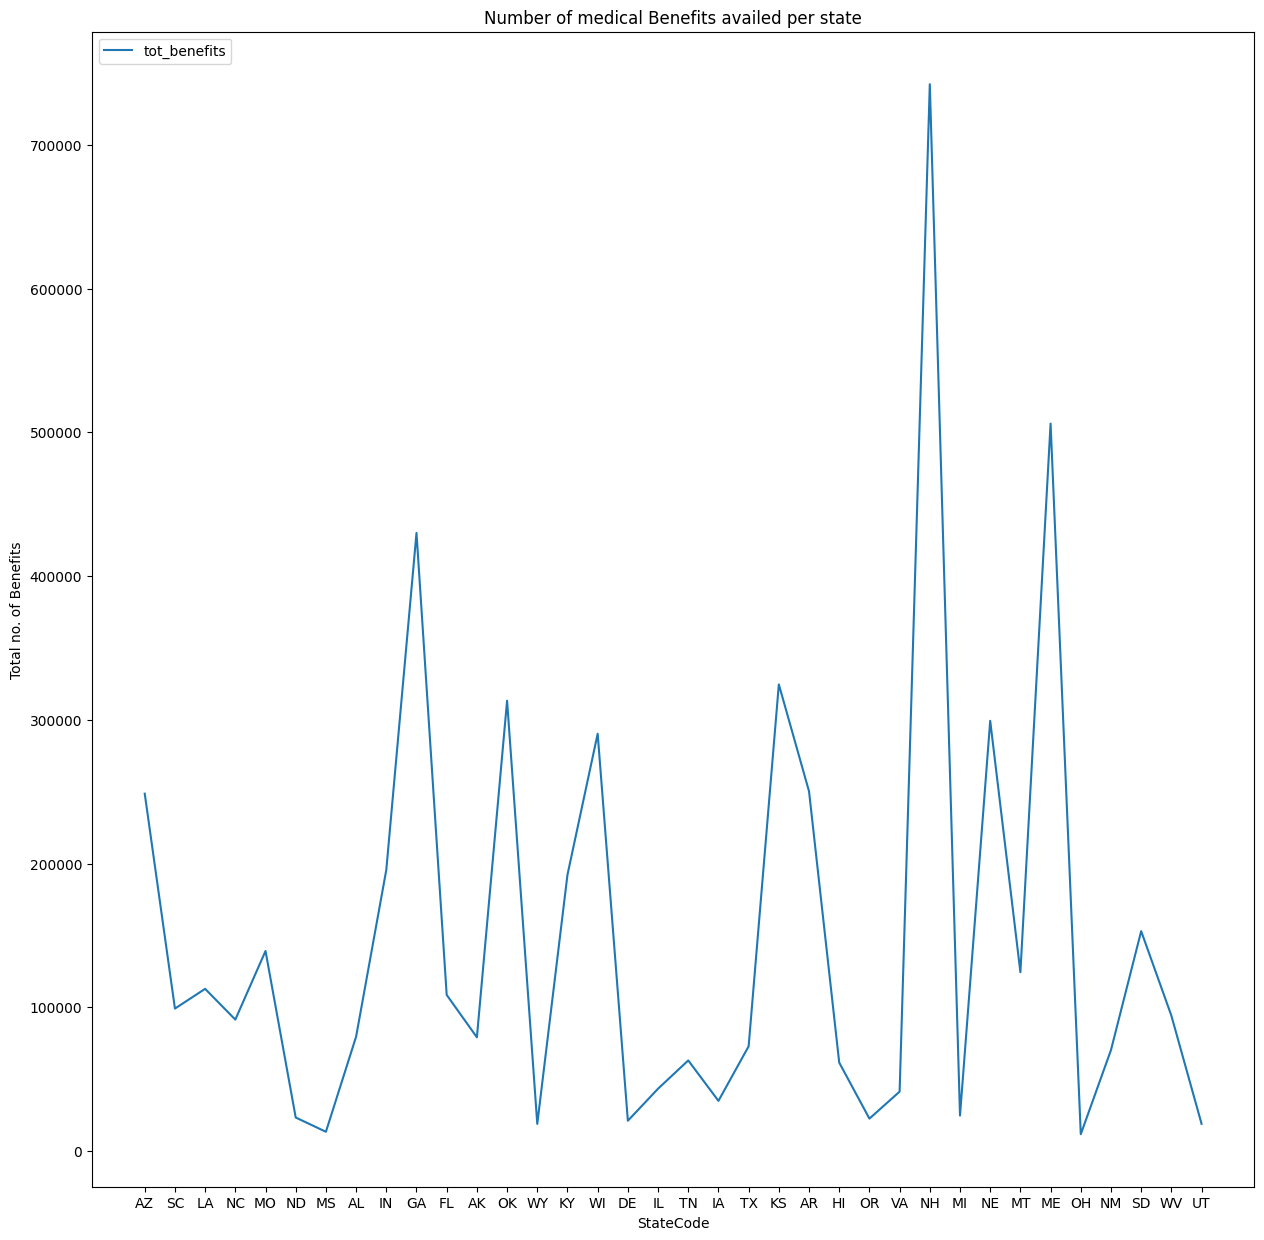

In [ ]:
#Let us plot the benefit_count on the y axis and each state on the x-axis
import matplotlib.pyplot as plt

y_benefits = [val.tot_benefits for val in tot_benefits.select('tot_benefits').collect()]
x_state = [val.StateCode for val in tot_benefits.select('StateCode').collect()]

plt.figure(figsize=(15, 15))
plt.plot(x_state, y_benefits)

plt.ylabel('Total no. of Benefits')
plt.xlabel('StateCode')
plt.title('Number of medical Benefits availed per state')
plt.legend(['tot_benefits'], loc='upper left')

plt.show()

In [ ]:
#This is difficult to read so let us sort in decreasing order from 
#the state which used maximum number of benefits to least
tot_benefits.createOrReplaceTempView ("tot_benefits")
tot_benefits_sort = spark.sql("SELECT * from tot_benefits ORDER BY tot_benefits DESC")
tot_benefits_sort.show(5)

+---------+------------+
|StateCode|tot_benefits|
+---------+------------+
|       TX|      742182|
|       FL|      506084|
|       WI|      430068|
|       OH|      324651|
|       NC|      313341|
+---------+------------+
only showing top 5 rows



<ipython-input-21-38b32e9b471a>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y_state, rotation='horizontal', fontsize='large')


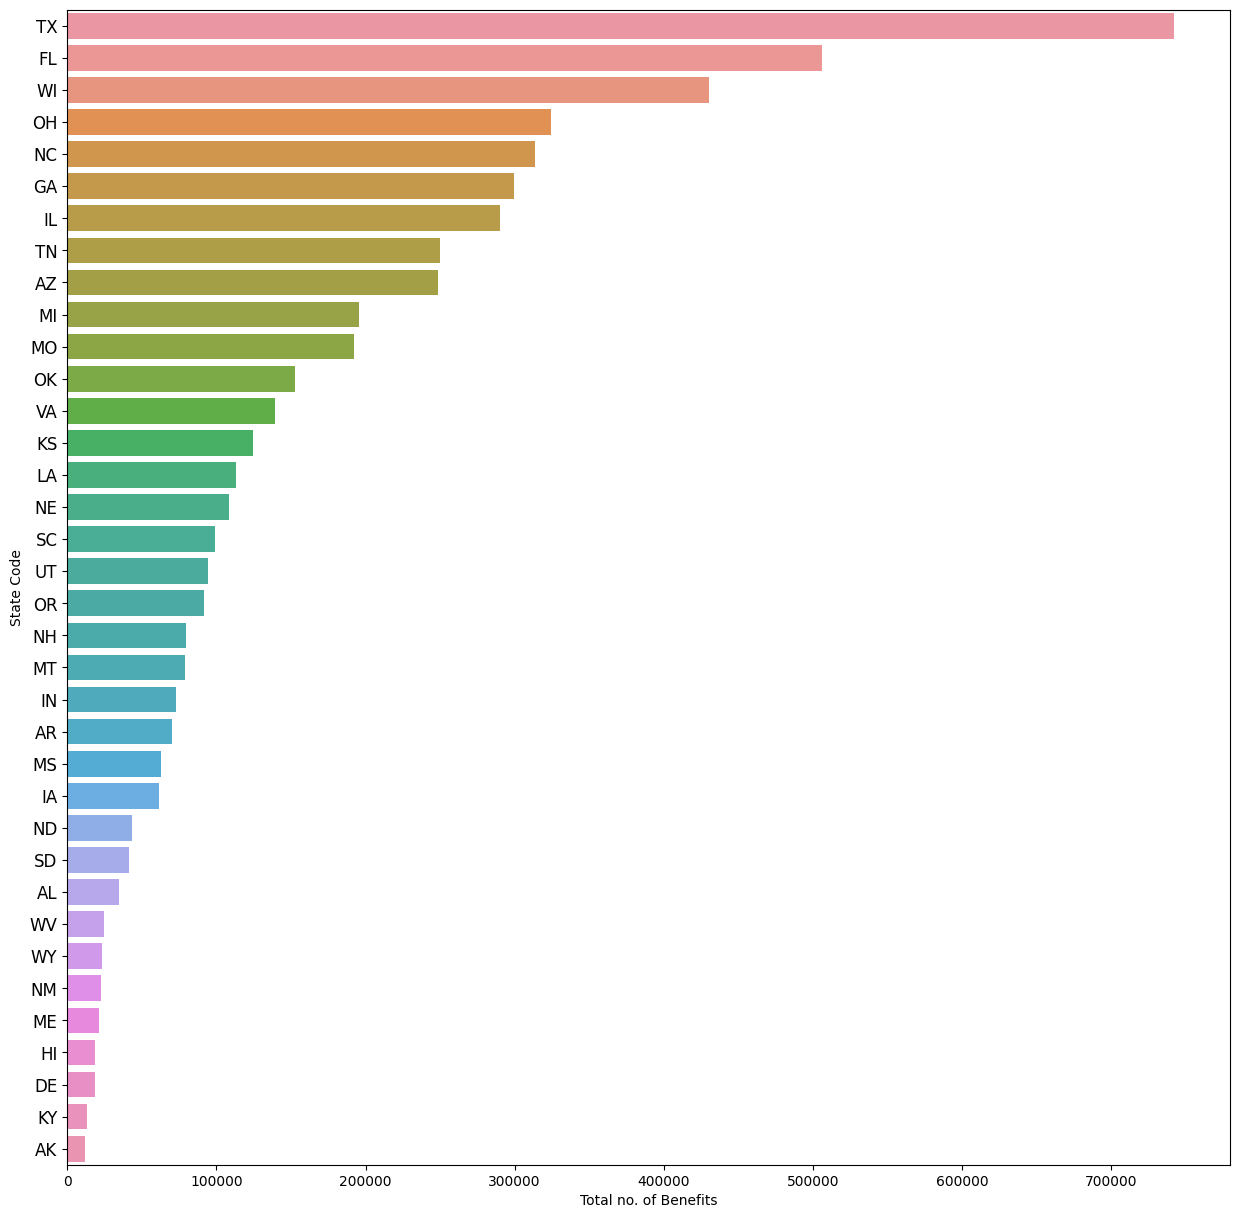

In [ ]:
#We can see that state TX(Texas) WI(Wisconsin) is using maximum number of benefits, followed by FL(Florida) and the WI(Wisconsin)
#Let's try to visualize this
import seaborn as sns
f, ax = plt.subplots(figsize=(15, 15)) 
x_benefits = [val.tot_benefits for val in tot_benefits_sort.select('tot_benefits').collect()]
y_state = [val.StateCode for val in tot_benefits_sort.select('StateCode').collect()]

ax.set_yticklabels(y_state, rotation='horizontal', fontsize='large')
g = sns.barplot(y = y_state, x= x_benefits)
plt.ylabel('State Code')
plt.xlabel('Total no. of Benefits')
plt.show()

In [ ]:
#Now we want to find the top benefit used in each state
#We can get an idea of which healthcare service is most needed in each state from this

window = Window.partitionBy("StateCode").orderBy(col("count").desc())
step1 = benefits_per_state.withColumn("row",row_number().over(window)) \
  .filter(col("row") <=1 )\
  .drop("row")
step1.show()

+---------+--------------------+-----+
|StateCode|         BenefitName|count|
+---------+--------------------+-----+
|       AK| Orthodontia - Child|  272|
|       AL| Orthodontia - Adult|  622|
|       AR|   Accidental Dental|  920|
|       AZ|   Accidental Dental| 3668|
|       DE|Dental Check-Up f...|  327|
|       FL|Basic Dental Care...| 7170|
|       GA|Dental Check-Up f...| 4319|
|       HI| Orthodontia - Child|  332|
|       IA|Major Dental Care...|  981|
|       IL| Orthodontia - Adult| 4291|
|       IN|Routine Dental Se...| 1179|
|       KS|Routine Dental Se...| 1830|
|       KY|Major Dental Care...|  201|
|       LA| Orthodontia - Child| 1628|
|       ME|Major Dental Care...|  306|
|       MI| Orthodontia - Adult| 3135|
|       MO|   Accidental Dental| 2843|
|       MS|   Accidental Dental|  896|
|       MT|Major Dental Care...| 1269|
|       NC|Routine Dental Se...| 4578|
+---------+--------------------+-----+
only showing top 20 rows



Thus we can see that in most of the states the maximum used benefit is related to dental care/Orthodontia

Thus dental care is the most sought after benefit and we can use this information to maximise profits

If we inform insurance providers about this, they can design their plans accordingly

# Part 2: Rate Vs State

In [ ]:
rate_data = spark.read\
        .option("InferSchema","true")\
        .option("header","true")\
        .format("csv")\
        .load("/content/drive/MyDrive/Adv Project/output1_r.csv")

In [ ]:
rs_data = rate_data.select("IndividualRate","StateCode")
rs_data.show(5)

+--------------+---------+
|IndividualRate|StateCode|
+--------------+---------+
|         51.23|       AK|
|         51.23|       AK|
|         51.23|       AK|
|         59.24|       AK|
|         59.24|       AK|
+--------------+---------+
only showing top 5 rows



To find understand the dependence of Individual Rate and State Code we can use coorelation ratio which will compare the intra category dispersion to the overall dispersion.<br>
Correlation ratio is defined as $ \eta^2 = \frac{\sum_{x}n_x(\bar{y_{x}}-\bar{y})^2}{\sum_{x,i}(y_{xi}-\bar{y})^2}$ or the ratio between the weighted variance of the category means and the overall variance <br> 
When correlation ratio is 1 then we know that the dispersion is because of the difference between the states suggesting high dependence between Individual Rate and State.
When correlation ratio is 0 then we know that the intra category dispersion is all the same suggestion no depence between the two columns Individual Rate and State.

We can easily calculate the overall denominator by finding variance and frequency/count and multiplying the variance with $\text{(frequency)}^2$ as shown below

In [ ]:
overall_variance = rs_data.select(variance(col('IndividualRate')).alias('variance')).collect()
overall_count = rs_data.select(count(col('IndividualRate')).alias('count')).collect()
overall_mean = rs_data.select(mean(col('IndividualRate')).alias('mean')).collect()

In [ ]:
overall_denominator = overall_variance[0][0]*overall_count[0][0]
overall_denominator

2552603601728.446

To find the numerator part we will use window functions to find the frequency and variance for each category (State).

In [ ]:
groups = Window.partitionBy("StateCode").orderBy("IndividualRate")
windowspec = Window.partitionBy("StateCode")

In [ ]:
state_stats = rs_data.withColumn("row",row_number().over(groups))\
  .withColumn("count",count(col("IndividualRate")).over(windowspec)) \
  .withColumn("mean", mean(col("IndividualRate")).over(windowspec)) \
  .where(col("row")==1).select("StateCode","count","mean")

In [ ]:
state_stats = state_stats.withColumn("overall_mean",lit(overall_mean[0][0]))

In [ ]:
num_part_udf = udf(lambda col1, col2, col3 : col3*(col1-col2)**2, FloatType())

In [ ]:
state_stats = state_stats.withColumn("numerator_part",num_part_udf(col("mean"),col("overall_mean"),col("count")))

In [ ]:
state_stats.show()

+---------+------+------------------+-----------------+--------------+
|StateCode| count|              mean|     overall_mean|numerator_part|
+---------+------+------------------+-----------------+--------------+
|       AL|147825| 348.4153670894682|416.3540904063704|   6.8231142E8|
|       AZ| 99245| 527.5037395334792|416.3540904063704|  1.22609702E9|
|       DE|  5202|424.94648212226105|416.3540904063704|     384059.47|
|       IL|163908|505.95795568245825|416.3540904063704|  1.31599322E9|
|       KY| 12699| 389.7601693046692|416.3540904063704|     8981198.0|
|       LA| 80172|443.85434166541944|416.3540904063704|   6.0631184E7|
|       ME| 12809|469.38443672417924|416.3540904063704|   3.6021696E7|
|       MI|676951|152.70758121341493|416.3540904063704|  4.7054512E10|
|       MO|146328| 492.2617412935295|416.3540904063704|   8.4313779E8|
|       MS| 60537|447.90267753605247|416.3540904063704|   6.0253284E7|
|       MT|121788|385.24014459552683|416.3540904063704|   1.1790024E8|
|     

In [ ]:
overall_numerator = state_stats.select(sum(col("numerator_part"))).collect()
overall_numerator = overall_numerator[0][0]
overall_numerator

114499779995.71875

In [ ]:
corr_ratio = overall_numerator/overall_denominator
corr_ratio

0.044856075545058174

From the above correlation ratio we can conclude that individual insurance rates aren't heavily affected by the state that the individual is from.

Despite the low correlation we can still plot a heatmap showing the average rates of insurance plans for each state which can be very insightful to insurance providers (its good to know which states people on average pays the most for their insurance plans.)

In [ ]:
average_rates = [val.mean for val in state_stats.select('mean').collect()]
states = [val.StateCode for val in state_stats.select('StateCode').collect()]

In [ ]:
import plotly.express as px
fig = px.choropleth(locations=states, locationmode="USA-states", color=average_rates, scope="usa", title="Average Annual Insurance Rate across States", labels={'color':'Avg. Annual Rate in USD'})
fig.show()

# Part 3: Effect of Age and Health Habits on Plan Rates

In [ ]:
#Read the Plan Rates CSV
df = spark.read\
.option("inferSchema", "true")\
.option("header", True)\
.csv("/content/drive/MyDrive/Adv Project/output1_r.csv")

In [ ]:
#Compute Average Individual Plan Rate for each age group
age_df = df.groupBy('Age')\
        .agg(avg('IndividualRate').alias('Average_Individuale_Rate'))\
        .orderBy('Age')
age_df.show(50)

+----+------------------------+
| Age|Average_Individuale_Rate|
+----+------------------------+
|0-14|      194.42509006271277|
|  15|       210.1615635964313|
|  16|      216.17061503715752|
|  17|       222.1797862391915|
|  18|      228.65096824322697|
|  19|      250.11251512556436|
|  20|       256.7971861618381|
|  21|       291.3517479349127|
|  22|      291.50137359449815|
|  23|       291.6845175014519|
|  24|       291.9062597729108|
|  25|      293.14308492416626|
|  26|        298.146739508799|
|  27|      303.96094579661377|
|  28|      313.27840076525786|
|  29|       320.9284107798996|
|  30|      324.80189739481136|
|  31|       330.5472044644588|
|  32|        336.292904177142|
|  33|       339.8955050832942|
|  34|       343.7361570019615|
|  35|      345.76310253612166|
|  36|      347.69946321518375|
|  37|       349.6715305826453|
|  38|      351.66183261043665|
|  39|       355.5685940133161|
|  40|       359.5034774290686|
|  41|        365.343622744979|
|  42|  

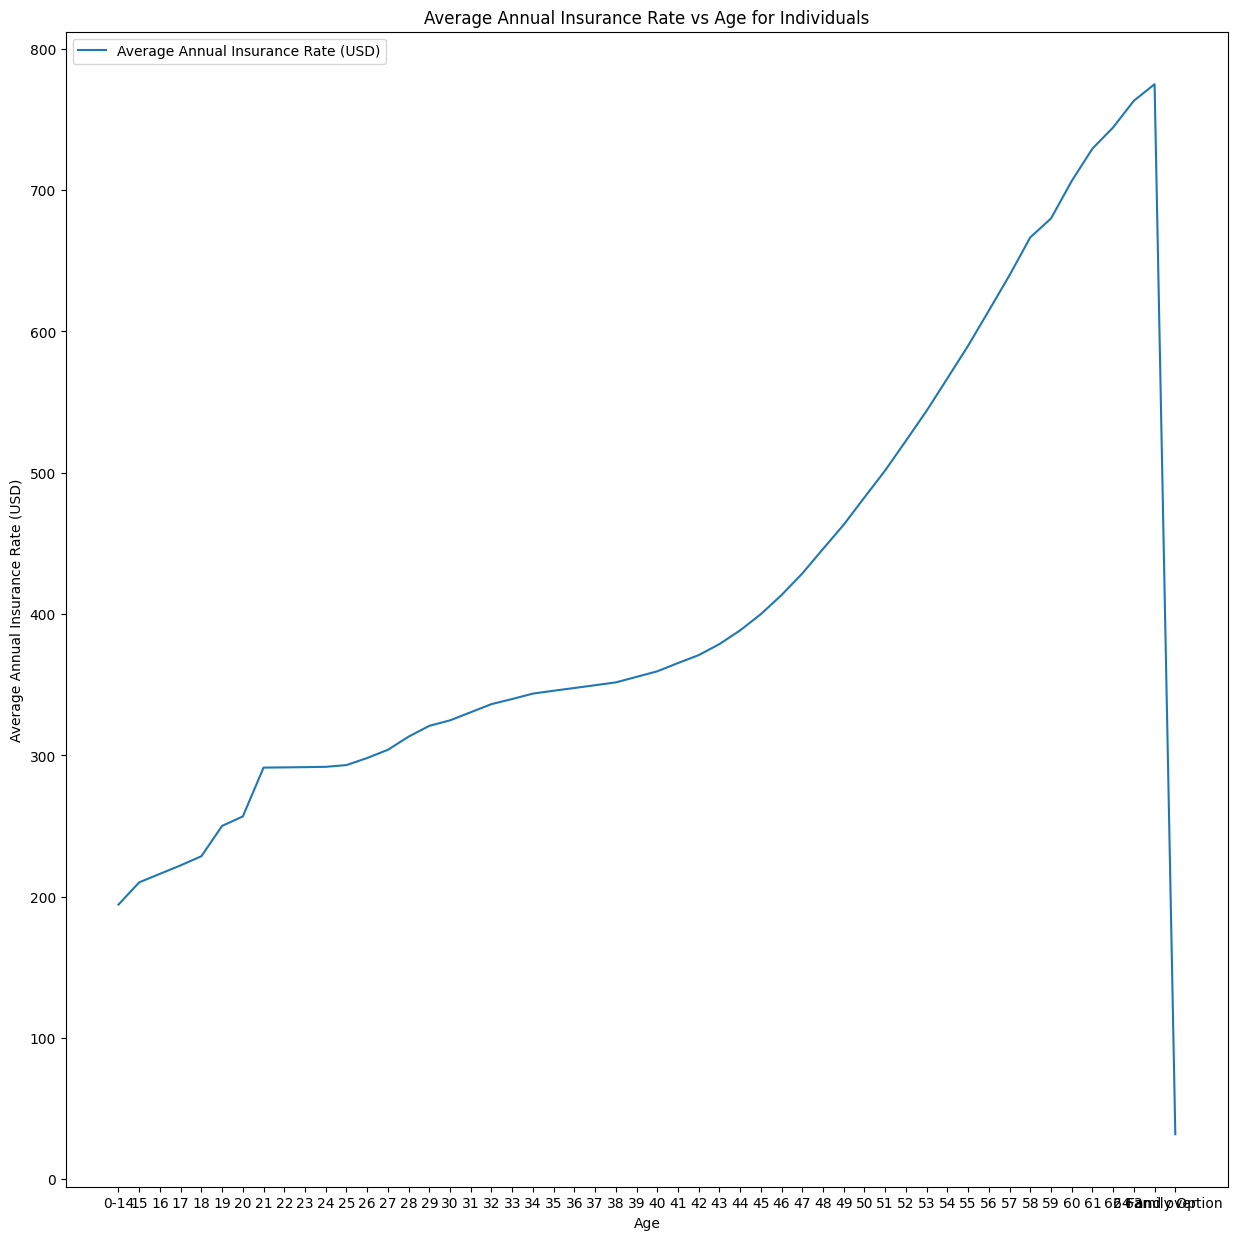

In [ ]:
#Rates seems to riseas age increases
import matplotlib.pyplot as plt

y_avg_rate = [val.Average_Individuale_Rate for val in age_df.select('Average_Individuale_Rate').collect()]
x_age = [val.Age for val in age_df.select('Age').collect()]

plt.figure( figsize=(15,15))
plt.plot(x_age, y_avg_rate)

plt.ylabel('Average Annual Insurance Rate (USD)')
plt.xlabel('Age')
plt.title('Average Annual Insurance Rate vs Age for Individuals')
plt.legend(['Average Annual Insurance Rate (USD)'], loc='upper left')

plt.show()

#Further analysis

In [ ]:
#Reading Plan Attributes CSV to perform further analysis on Plan Rates and Age 
plan_df = spark.read\
.option("inferSchema", "true")\
.option("header", True)\
.csv("/content/drive/MyDrive/Adv Project/output2_pa.csv")

In [ ]:
#Select and pre-process required columns - remove state code from the plsn ID to comvbine the 2 datasets on plan ID
plan_df = plan_df.withColumn('planid', substring('planid', 1,14))\
                 .select('planid', 'dentalonlyplan')
plan_df.show()

+--------------+--------------+
|        planid|dentalonlyplan|
+--------------+--------------+
|38344AK1060002|            No|
|21989AK0030001|           Yes|
|21989AK0030001|           Yes|
|21989AK0050001|           Yes|
|21989AK0050001|           Yes|
|21989AK0050002|           Yes|
|21989AK0050002|           Yes|
|21989AK0070001|           Yes|
|21989AK0080001|           Yes|
|21989AK0080002|           Yes|
|21989AK0080003|           Yes|
|21989AK0090001|           Yes|
|21989AK0090002|           Yes|
|21989AK0090003|           Yes|
|21989AK0100001|           Yes|
|21989AK0100002|           Yes|
|21989AK0100003|           Yes|
|21989AK0110001|           Yes|
|21989AK0130001|           Yes|
|21989AK0130002|           Yes|
+--------------+--------------+
only showing top 20 rows



In [ ]:
#Checking Non-Dental Plans and dental plan separately to see how the average rate looks like
#Start with non-dental plans
med_avg = df.join(plan_df, ['planid'])\
        .select(col('Age'), col('IndividualRate'), col('dentalonlyplan'),col('statecode'))\
        .filter(col('dentalonlyplan') == 'No')\
        .groupBy('age')\
        .agg(avg(col('IndividualRate')).alias('med_rate_avg'))\
        .orderBy(col('Age'))
med_avg.show()

+----+------------------+
| age|      med_rate_avg|
+----+------------------+
|0-14|305.32203440257433|
|  15|331.40536031003586|
|  16| 341.3783644014329|
|  17| 351.3515113864926|
|  18|362.09155757022245|
|  19| 372.8317589398978|
|  20| 383.9561502170072|
|  21| 401.2110187788282|
|  22|401.42944373704364|
|  23| 401.7046587334134|
|  24|402.04539901888484|
|  25|404.09643982657354|
|  26|412.31716700555154|
|  27|421.95933156845626|
|  28|437.43562980185266|
|  29| 450.1343440643096|
|  30|456.48399941648336|
|  31| 466.0082507627483|
|  32| 475.5320940773064|
|  33| 481.4847365581935|
+----+------------------+
only showing top 20 rows



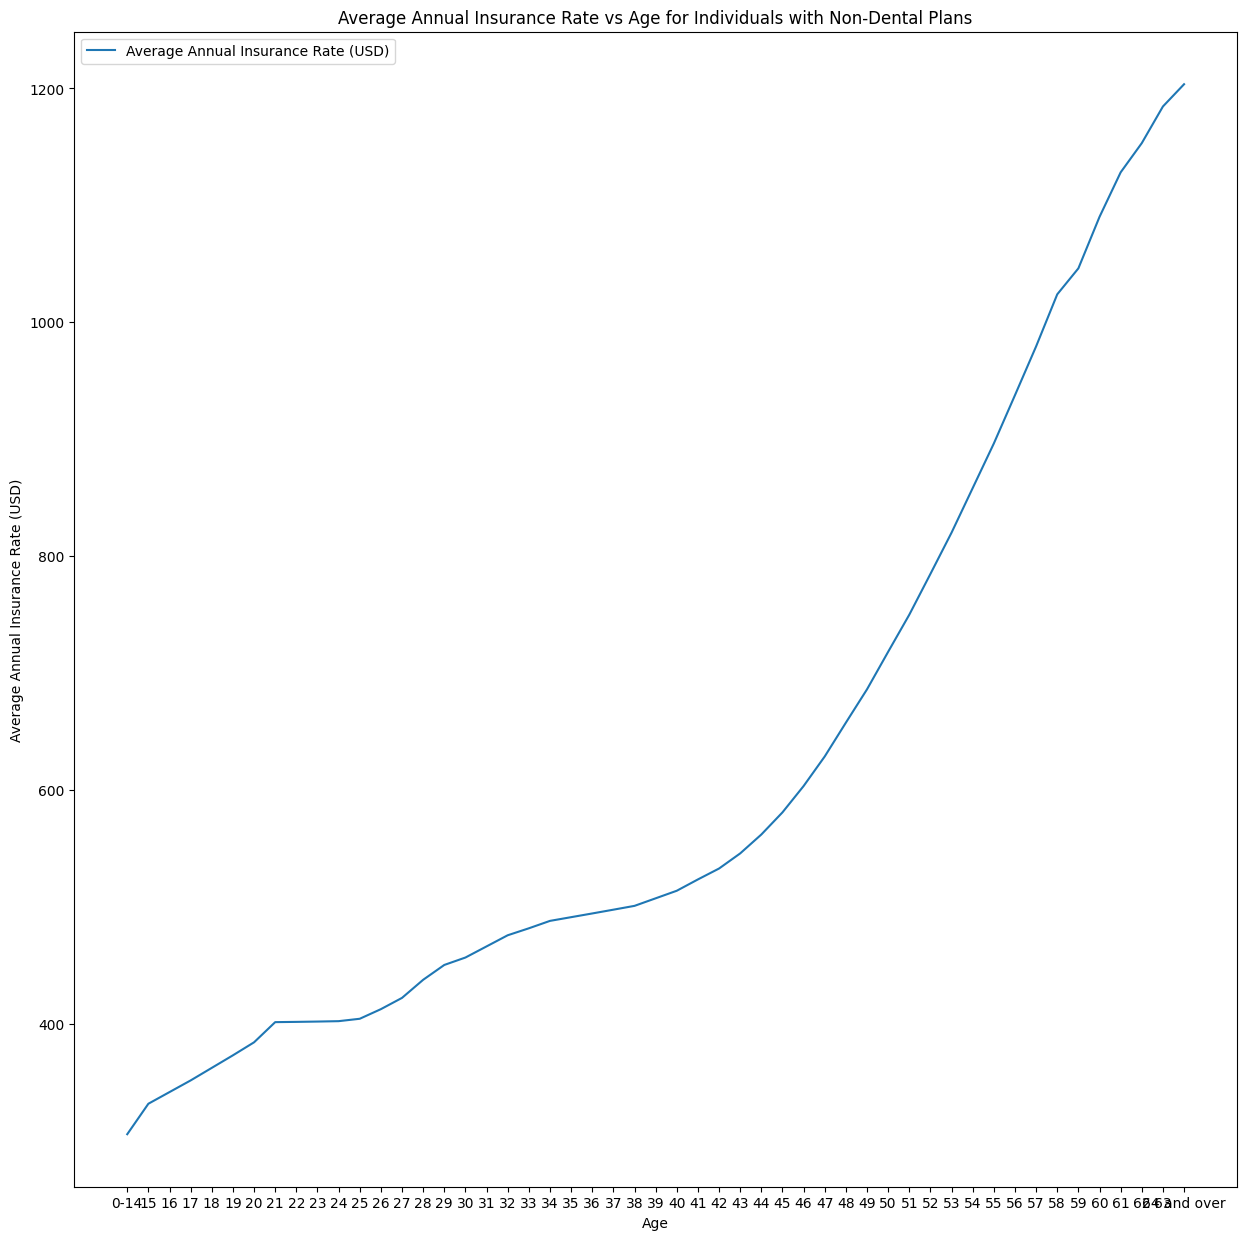

In [ ]:
#Rates increase with age for non-dental plans
import matplotlib.pyplot as plt

y_avg_rate = [val.med_rate_avg for val in med_avg.select('med_rate_avg').collect()]
x_age = [val.age for val in med_avg.select('age').collect()]

plt.figure( figsize=(15,15))
plt.plot(x_age, y_avg_rate)

plt.ylabel('Average Annual Insurance Rate (USD)')
plt.xlabel('Age')
plt.title('Average Annual Insurance Rate vs Age for Individuals with Non-Dental Plans')
plt.legend(['Average Annual Insurance Rate (USD)'], loc='upper left')

plt.show()

In [ ]:
#Check the individual rates state-wise
med = df.join(plan_df, ['planid'])\
        .select(col('Age') ,col('statecode'), col('IndividualRate'), col('dentalonlyplan'))\
        .filter(col('dentalonlyplan') == 'No')\
        .orderBy(col('Age'), col('statecode'))
med.show()


+----+---------+--------------+--------------+
| Age|statecode|IndividualRate|dentalonlyplan|
+----+---------+--------------+--------------+
|0-14|       AK|         355.0|            No|
|0-14|       AK|         355.0|            No|
|0-14|       AK|         364.0|            No|
|0-14|       AK|         373.0|            No|
|0-14|       AK|         373.0|            No|
|0-14|       AK|         364.0|            No|
|0-14|       AK|         355.0|            No|
|0-14|       AK|         373.0|            No|
|0-14|       AK|         355.0|            No|
|0-14|       AK|         373.0|            No|
|0-14|       AK|         355.0|            No|
|0-14|       AK|         373.0|            No|
|0-14|       AK|         373.0|            No|
|0-14|       AK|         355.0|            No|
|0-14|       AK|         364.0|            No|
|0-14|       AK|         373.0|            No|
|0-14|       AK|         364.0|            No|
|0-14|       AK|         355.0|            No|
|0-14|       

In [ ]:
#Find out correlation between age and plan rates for non-dental plans
#substring of 0-20 to 20
#convert string to int using cast
med = med.withColumn("Age", when(med.Age == "0-20","20")
                           .when(med.Age == "65 and over", "65" )
                           .otherwise(med.Age))\
         .filter( med.Age != "Family Option" )

med = med.withColumn( "Age", col("Age").cast("integer"))


In [ ]:
med.stat.corr("Age", "IndividualRate")
#We get a decent correlation

0.5797855899844946

In [ ]:
med_avg = med_avg.withColumn("age", when(med_avg.age == "0-20","20") 
                           .when(med_avg.age == "65 and over", "65" )
                           .otherwise(med_avg.age))\
         .filter( med_avg.age != "Family Option" )
med_avg = med_avg.withColumn( "age", col("age").cast("integer"))

med_avg.stat.corr("age", "med_rate_avg" )

0.707746752056837

In [ ]:
#Checking Dental Plans
den_avg = df.join(plan_df, ['planid'])\
        .select(col('Age'), col('IndividualRate'), col('dentalonlyplan'),col('statecode'))\
        .filter(col('dentalonlyplan') == 'Yes')\
        .groupBy('age')\
        .agg(avg(col('IndividualRate')).alias('den_rate_avg'))\
        .orderBy(col('Age'))
den_avg.show()

+----+------------------+
| age|      den_rate_avg|
+----+------------------+
|0-14|  28.3193414254033|
|  15|28.405743403683445|
|  16|28.405743403683434|
|  17|28.405743403683445|
|  18|28.405743403683434|
|  19|59.525449021428734|
|  20| 59.46699855955117|
|  21| 147.9057753098459|
|  22|147.95649509117354|
|  23|148.00882660059546|
|  24|148.06284122138405|
|  25|148.11188501983946|
|  26| 148.3699460692515|
|  27|148.43407027221178|
|  28| 148.4929457398658|
|  29| 148.5518102935479|
|  30| 148.7098866815154|
|  31|148.77037918676334|
|  32| 148.8325061329649|
|  33|148.89625247653882|
+----+------------------+
only showing top 20 rows



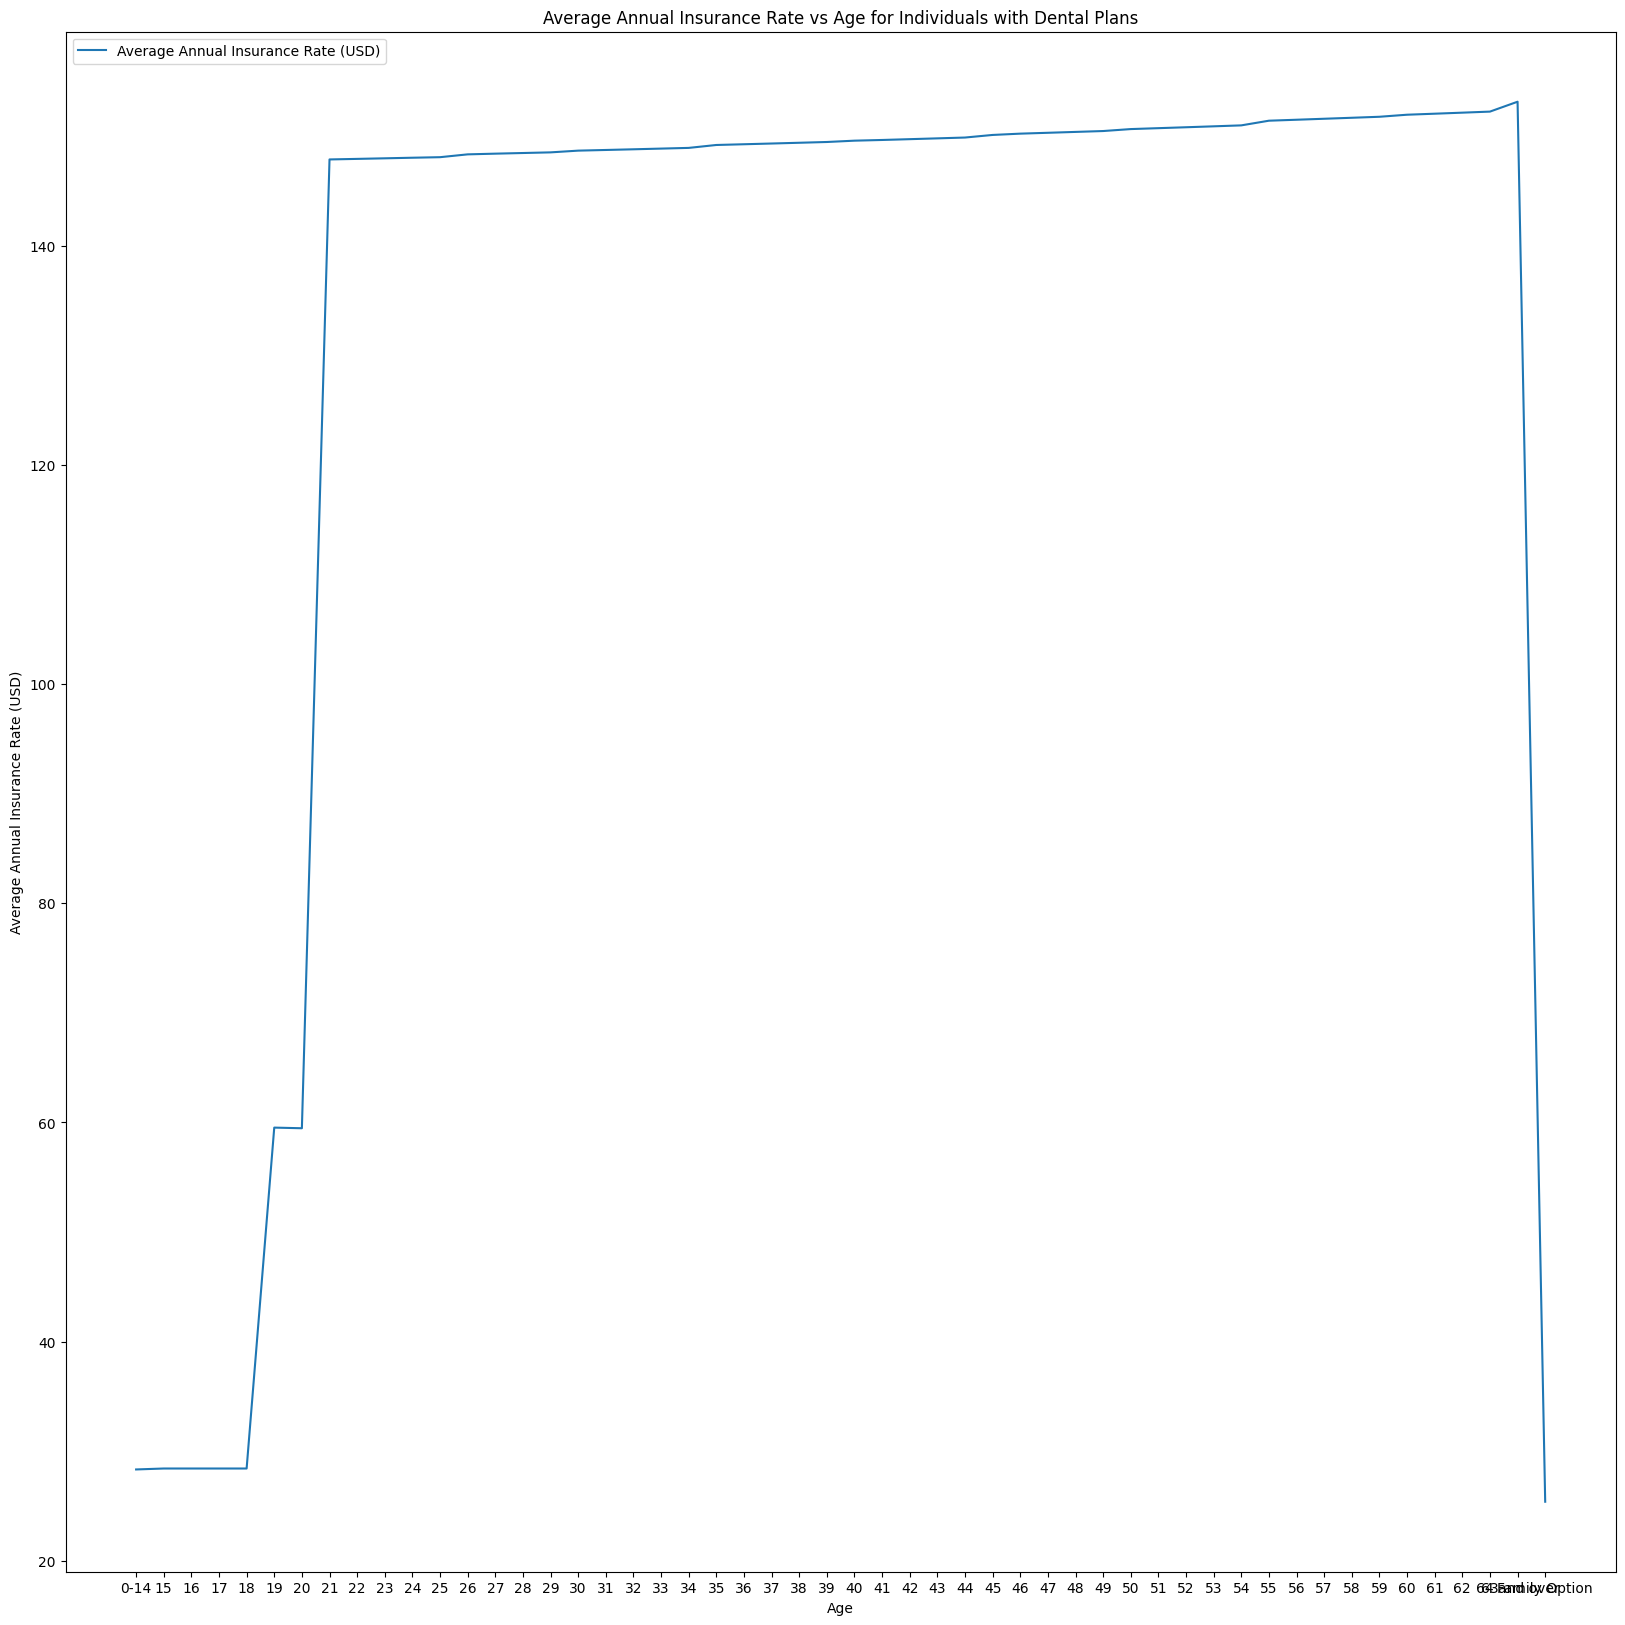

In [ ]:
import matplotlib.pyplot as plt

y_avg_rate = [val.den_rate_avg for val in den_avg.select('den_rate_avg').collect()]
x_age = [val.age for val in den_avg.select('age').collect()]

plt.figure( figsize=(20,20))
plt.plot(x_age, y_avg_rate)

plt.ylabel('Average Annual Insurance Rate (USD)')
plt.xlabel('Age')
plt.title('Average Annual Insurance Rate vs Age for Individuals with Dental Plans')
plt.legend(['Average Annual Insurance Rate (USD)'], loc='upper left')

plt.show()

In [ ]:
den = df.join(plan_df, ['planid'])\
        .select(col('Age') ,col('statecode'), col('IndividualRate'), col('dentalonlyplan'))\
        .filter(col('dentalonlyplan') == 'Yes')\
        .orderBy(col('Age'), col('statecode'))
den.show()

+----+---------+--------------+--------------+
| Age|statecode|IndividualRate|dentalonlyplan|
+----+---------+--------------+--------------+
|0-14|       AK|          61.0|           Yes|
|0-14|       AK|          55.0|           Yes|
|0-14|       AK|          61.0|           Yes|
|0-14|       AK|          61.0|           Yes|
|0-14|       AK|          61.0|           Yes|
|0-14|       AK|          61.0|           Yes|
|0-14|       AK|          55.0|           Yes|
|0-14|       AK|          61.0|           Yes|
|0-14|       AK|          55.0|           Yes|
|0-14|       AK|          61.0|           Yes|
|0-14|       AK|          55.0|           Yes|
|0-14|       AK|          61.0|           Yes|
|0-14|       AK|          55.0|           Yes|
|0-14|       AK|          61.0|           Yes|
|0-14|       AK|          55.0|           Yes|
|0-14|       AK|          61.0|           Yes|
|0-14|       AK|          55.0|           Yes|
|0-14|       AK|          55.0|           Yes|
|0-14|       

In [ ]:
#Find correlation between age and plan rates for dental plans
den = den.withColumn("Age", when(den.Age == "0-20","20") 
                           .when(den.Age == "65 and over", "65" )
                           .otherwise(den.Age))\
         .filter( den.Age != "Family Option" )

den = den.withColumn( "Age", col("Age").cast("integer"))
den.stat.corr("Age", "IndividualRate")
#We can see that the correlation of dental plans with age is not very great, thus plan rates not age dependent

0.025798020420670073

In [ ]:
den_avg = den_avg.withColumn("age", when(den_avg.age == "0-20","20") 
                           .when(den_avg.age == "65 and over", "65" ) 
                           .otherwise(den_avg.age))\
         .filter( den_avg.age != "Family Option" )
den_avg = den_avg.withColumn( "age", col("age").cast("integer"))

den_avg.stat.corr("age", "den_rate_avg" )

0.5888660908041548

In [ ]:
#Analysing based on Health Habits
hdf = df.select(col('Age'), col('Tobacco'), col('IndividualRate'), col('IndividualTobaccoRate'))
hdf.show()

+-------------+-------+--------------+---------------------+
|          Age|Tobacco|IndividualRate|IndividualTobaccoRate|
+-------------+-------+--------------+---------------------+
|Family Option|   null|         51.23|                 null|
|Family Option|   null|         51.23|                 null|
|Family Option|   null|         51.23|                 null|
|Family Option|   null|         59.24|                 null|
|Family Option|   null|         59.24|                 null|
|Family Option|   null|         59.24|                 null|
|Family Option|   null|         63.59|                 null|
|Family Option|   null|         63.59|                 null|
|Family Option|   null|         63.59|                 null|
|Family Option|   null|         47.64|                 null|
|Family Option|   null|         47.64|                 null|
|Family Option|   null|         47.64|                 null|
|Family Option|   null|         55.09|                 null|
|Family Option|   null| 

In [ ]:
#Encode No Preference for Tobacco as 0 and a preference as 1
#Fill IndividualTobaccoRate as 0 when there is no preference
hdfp = hdf.withColumn("Tobacco", when(hdf.Tobacco == "No Preference",0) \
      .otherwise(1))
hdfp = hdfp.na.fill(0)
hdfp.show()

+-------------+-------+--------------+---------------------+
|          Age|Tobacco|IndividualRate|IndividualTobaccoRate|
+-------------+-------+--------------+---------------------+
|Family Option|      1|         51.23|                  0.0|
|Family Option|      1|         51.23|                  0.0|
|Family Option|      1|         51.23|                  0.0|
|Family Option|      1|         59.24|                  0.0|
|Family Option|      1|         59.24|                  0.0|
|Family Option|      1|         59.24|                  0.0|
|Family Option|      1|         63.59|                  0.0|
|Family Option|      1|         63.59|                  0.0|
|Family Option|      1|         63.59|                  0.0|
|Family Option|      1|         47.64|                  0.0|
|Family Option|      1|         47.64|                  0.0|
|Family Option|      1|         47.64|                  0.0|
|Family Option|      1|         55.09|                  0.0|
|Family Option|      1| 

In [ ]:
tb = hdfp.filter(col('IndividualTobaccoRate') != 0)
tb.show()

+----+-------+--------------+---------------------+
| Age|Tobacco|IndividualRate|IndividualTobaccoRate|
+----+-------+--------------+---------------------+
|0-14|      1|         355.0|                355.0|
|  15|      1|         387.0|                387.0|
|  16|      1|         399.0|                399.0|
|  17|      1|         411.0|                411.0|
|  18|      1|         424.0|                424.0|
|  19|      1|         437.0|                437.0|
|  20|      1|         450.0|                450.0|
|  21|      1|         464.0|                499.0|
|  22|      1|         464.0|                499.0|
|  23|      1|         464.0|                499.0|
|  24|      1|         464.0|                499.0|
|  25|      1|         466.0|                501.0|
|  26|      1|         475.0|                511.0|
|  27|      1|         486.0|                523.0|
|  28|      1|         504.0|                542.0|
|  29|      1|         519.0|                558.0|
|  30|      

In [ ]:
tb.stat.corr('IndividualTobaccoRate', 'IndividualRate')
#We have a great correlation with IndividualTobaccoRate and IndividualRate

0.9914307277254333

#Part 4: Distribution of Rates across Insurance Issuers


In [ ]:
groups = Window.partitionBy("IssuerId").orderBy("IndividualRate")
windowspec = Window.partitionBy("IssuerId")

In [ ]:
ipdata = rate_data.select("IssuerId","IndividualRate")

In [ ]:
ipdata_stats = ipdata.withColumn("row",row_number().over(groups))\
  .withColumn("count",count(col("IndividualRate")).over(windowspec)) \
  .withColumn("mean", mean(col("IndividualRate")).over(windowspec)) \
  .withColumn("stddev",stddev(col("IndividualRate")).over(windowspec))\
  .where(col("row")==1).select("IssuerId","count","mean","stddev")

In [ ]:
ipdata_stats.show()

+--------+------+------------------+------------------+
|IssuerId| count|              mean|            stddev|
+--------+------+------------------+------------------+
|   10046|   612|39.632973856209055|7.8820138108567415|
|   10091| 12291| 414.5151737043365|330.36098483733423|
|   10207|  2397| 579.2262745098029| 290.3995309795945|
|   11269|  6732| 842.9634640522881| 383.1836184616705|
|   11469|   816|22.133125000000025| 6.524817909336631|
|   11512| 41310| 602.7657460663286| 299.4378585318441|
|   12513|  1530|33.530163398692665|18.106716600273227|
|   12538|  7956|21.028115887379858| 4.212323282521675|
|   13591|   765| 711.4917647058821| 320.7314193859185|
|   13711|  5610| 31.98844919786009| 9.181366418150187|
|   14624|  3468| 559.5337716262953|271.18679742286764|
|   15105|  9129| 468.2784499945218|217.37939513436945|
|   15560|318801| 61.63480619571704|159.03546465014944|
|   15724|  2856| 524.0087114845937|234.87143984307878|
|   15833| 46767|15.697101802553242| 3.594509310

With the above information we have have effectively calculated the dispersion (using standard deviation) of plan rates across each of the issuers which tells us how the data is distributed in each of the issuerid groups.

In [ ]:
ipdata_stats.sort(col("stddev").desc()).show(5)

+--------+-----+------------------+------------------+
|IssuerId|count|              mean|            stddev|
+--------+-----+------------------+------------------+
|   86830| 2142| 4327.676470588235| 4940.810761905129|
|   48121|51204| 2095.672988828998|3625.2822884538127|
|   74483| 7701|2342.7568406700443|3590.8703037611435|
|   40411| 2448|  9020.72794117647|2967.8525781354238|
|   52129| 1989| 9021.202111613877|2966.5538165783437|
+--------+-----+------------------+------------------+
only showing top 5 rows



The above statistics shows us issuers which have a very diverse portfolio based on standard deviation

## Part V - Predicting Individual Insurance Rate

In [ ]:
rate = spark.read\
        .option("InferSchema","true")\
        .option("header","true")\
        .format("csv")\
        .load("/content/drive/MyDrive/Adv Project/output1_r.csv")

In [ ]:
#Filter million dollar dataset from rate table
rate = rate.filter(col("IndividualRate")!= 99999)

In [ ]:
#Filter all null values
rate = rate.where(col("IndividualTobaccoRate").isNotNull())

In [ ]:
rate = rate.withColumn("Age", when(rate.Age == "0-20","20")
                           .when(rate.Age == "65 and over", "65" )
                           .otherwise(rate.Age))\
         .filter( rate.Age != "Family Option" )
rate = rate.withColumn( "Age", col("Age").cast("integer"))

In [ ]:
rate = rate.where(col("Age").isNotNull())

In [ ]:
features = ["Age","IndividualTobaccoRate"]
label = ["IndividualRate"]
all_columns = features+label

In [ ]:
rate = rate.select(all_columns)

In [ ]:
for column in rate.columns:
    if (rate.where(col(column).isNull()).count() >0):
        print(column)

The pipeline includes a vector assembler which will convert all the feature fields into a vector which builds the feature vector for the linear regression model

In [ ]:
from pyspark.ml.feature import VectorAssembler

stages = []
assembler = VectorAssembler(inputCols=features, outputCol="features")
stages += [assembler]

In [ ]:
from pyspark.ml import Pipeline
pipeline = Pipeline(stages = stages)
pipelineModel = pipeline.fit(rate)
rate = pipelineModel.transform(rate)
selectedCols = ['features'] + all_columns
df = rate.select(selectedCols)
df.printSchema()

root
 |-- features: vector (nullable = true)
 |-- Age: integer (nullable = true)
 |-- IndividualTobaccoRate: double (nullable = true)
 |-- IndividualRate: double (nullable = true)



In [ ]:
train, test = df.randomSplit([0.7, 0.3], seed = 2022)
print("Training Dataset Count: " + str(train.count()))
print("Test Dataset Count: " + str(test.count()))

Training Dataset Count: 2325834
Test Dataset Count: 997199


In [ ]:
train.select("features").show()

+-------------+
|     features|
+-------------+
| [15.0,128.2]|
|[15.0,133.14]|
|[15.0,134.23]|
| [15.0,140.7]|
|[15.0,143.79]|
|[15.0,145.39]|
|[15.0,148.32]|
|[15.0,148.37]|
|[15.0,148.52]|
|[15.0,148.52]|
|[15.0,148.52]|
|[15.0,156.34]|
|[15.0,157.53]|
|[15.0,158.84]|
|[15.0,160.54]|
|[15.0,160.87]|
|[15.0,161.03]|
|[15.0,161.48]|
|[15.0,167.51]|
|[15.0,167.78]|
+-------------+
only showing top 20 rows



Linear Regression Model

In [ ]:
from pyspark.ml.regression import LinearRegression
lr = LinearRegression(featuresCol = 'features', labelCol = 'IndividualRate', maxIter=10)
lrModel = lr.fit(train)

In [ ]:
accuracy = lrModel.summary.r2

In [ ]:
accuracy*100

98.23562375796375

In [ ]:
lrModel.coefficients

DenseVector([-0.452, 0.8261])

In [ ]:
predictions = lrModel.transform(test)
predictions.select('prediction', 'IndividualRate').show(5)

+------------------+--------------+
|        prediction|IndividualRate|
+------------------+--------------+
|151.36863410001172|        130.55|
| 153.5083487148097|        133.14|
| 160.3570877714412|        141.43|
|161.70370353287777|        143.06|
|163.62862054155707|        145.39|
+------------------+--------------+
only showing top 5 rows



#Part 5: Predicting Plan rates

In [ ]:
rate = spark.read\
        .option("InferSchema","true")\
        .option("header","true")\
        .format("csv")\
        .load("/content/drive/MyDrive/Adv Project/output1_r.csv")

plan = spark.read\
        .option("InferSchema","true")\
        .option("header","true")\
        .format("csv")\
        .load("/content/drive/MyDrive/Adv Project/output2_pa.csv")

In [ ]:
rate = rate.filter(col("IndividualRate")!= 99999)


In [ ]:
rate = rate.groupBy("PlanId").agg(avg("IndividualRate").alias("Avg"))

In [ ]:
rate.show()

+--------------+------------------+
|        PlanId|               Avg|
+--------------+------------------+
|15560MI0720003|  26.5649836601307|
|53901AZ1420027| 671.6096732026144|
|97667AZ0110016| 537.8208683473389|
|12379FL0010004| 691.0651568627451|
|12379FL0010006| 470.7122352941179|
|56503FL1320001| 357.9974509803922|
|58081GA0010005| 513.2848366013072|
|70893GA0010032| 581.5922222222222|
|89942GA0060003| 678.3549509803938|
|63366IA0010022| 32.99947712418305|
|83557IN0020003| 39.15703575547879|
|76763KS0010001| 515.5938235294118|
|80065KS0010021| 466.4216013071896|
|36239KY1140058| 612.5701960784314|
|48396ME0720067|  546.304705882353|
|73301AL0020003| 519.2482352941175|
|93299FL0010001| 1.960294117647059|
|83761GA0040312| 771.3298039215683|
|36096IL0950033| 624.0435947712419|
|60600IL0010001|2.8519607843137247|
+--------------+------------------+
only showing top 20 rows



In [ ]:
plan = plan.withColumn("PlanId",substring("PlanId",1,14))

In [ ]:
features = ["BeginPrimaryCareCostSharingAfterNumberOfVisits",
"BeginPrimaryCareDeductibleCoinsuranceAfterNumberOfCopays",
"ChildOnlyOffering",
"DentalOnlyPlan",
"DiseaseManagementProgramsOffered",
"FirstTierUtilization",
"MarketCoverage",
"MetalLevel",
"OutOfCountryCoverage",
"PlanType",
"WellnessProgramOffered"]

label = ["PlanId"]

all_columns = features+label

In [ ]:
plan = plan.select(all_columns)

In [ ]:
planattr = plan.join(rate,["PlanId"])

In [ ]:
planattr.cache()

DataFrame[PlanId: string, BeginPrimaryCareCostSharingAfterNumberOfVisits: string, BeginPrimaryCareDeductibleCoinsuranceAfterNumberOfCopays: string, ChildOnlyOffering: string, DentalOnlyPlan: string, DiseaseManagementProgramsOffered: string, FirstTierUtilization: string, MarketCoverage: string, MetalLevel: string, OutOfCountryCoverage: string, PlanType: string, WellnessProgramOffered: string, Avg: double]

In [ ]:
planattr.show(5)

+--------------+----------------------------------------------+--------------------------------------------------------+--------------------+--------------+--------------------------------+--------------------+--------------+----------+--------------------+--------+----------------------+----------------+
|        PlanId|BeginPrimaryCareCostSharingAfterNumberOfVisits|BeginPrimaryCareDeductibleCoinsuranceAfterNumberOfCopays|   ChildOnlyOffering|DentalOnlyPlan|DiseaseManagementProgramsOffered|FirstTierUtilization|MarketCoverage|MetalLevel|OutOfCountryCoverage|PlanType|WellnessProgramOffered|             Avg|
+--------------+----------------------------------------------+--------------------------------------------------------+--------------------+--------------+--------------------------------+--------------------+--------------+----------+--------------------+--------+----------------------+----------------+
|15560MI0720003|                                             0|                

In [ ]:
planattr.groupBy("PlanId").count().show()

+--------------+-----+
|        PlanId|count|
+--------------+-----+
|15560MI0720003|    6|
|29698MI0540450|    7|
|34930MI0110003|    3|
|90714MS0010019|   12|
|90714MS0030014|   14|
|37900NC0010015|    8|
|56891NC0030008|    3|
|37160ND2410022|   12|
|83653NE0010007|    4|
|83653NE0010010|   13|
|96751NH0160044|    6|
|33602TX0460691|   21|
|37833WI0540014|    4|
|38345WI0080047|   12|
|86584WI0010003|   12|
|13877AZ0070045|   14|
|68398FL0030024|    7|
|34762MO0590013|    6|
|11512NC0140010|    7|
|45480OK0050021|    4|
+--------------+-----+
only showing top 20 rows



In [ ]:
planattr = planattr.withColumn("ChildOnlyOffering", lower("ChildOnlyOffering"))\
                    .withColumn("WellnessProgramOffered", when(lower("WellnessProgramOffered") == "no","no")
                                                        .when(lower("WellnessProgramOffered").isNull(),"none")
                                                        .otherwise("yes"))
                    


In [ ]:
planattr.show(5)

+--------------+----------------------------------------------+--------------------------------------------------------+--------------------+--------------+--------------------------------+--------------------+--------------+----------+--------------------+--------+----------------------+----------------+
|        PlanId|BeginPrimaryCareCostSharingAfterNumberOfVisits|BeginPrimaryCareDeductibleCoinsuranceAfterNumberOfCopays|   ChildOnlyOffering|DentalOnlyPlan|DiseaseManagementProgramsOffered|FirstTierUtilization|MarketCoverage|MetalLevel|OutOfCountryCoverage|PlanType|WellnessProgramOffered|             Avg|
+--------------+----------------------------------------------+--------------------------------------------------------+--------------------+--------------+--------------------------------+--------------------+--------------+----------+--------------------+--------+----------------------+----------------+
|15560MI0720003|                                             0|                

In [ ]:
perc_conv = udf(lambda col1: float(col1[:-1])/100, FloatType())

In [ ]:
planattr = planattr.withColumn("FirstTierUtilization", perc_conv(col("FirstTierUtilization")))

In [ ]:
planattr = planattr.withColumn("DiseaseManagementProgramsOffered", when(col("DiseaseManagementProgramsOffered").isNull(),"no")\
                                                        .otherwise("yes"))

In [ ]:
planattr = planattr.where(col("PlanId").isNotNull())

In [ ]:
for column in planattr.columns:
    if (planattr.where(col(column).isNull()).count() >0):
        print(column)

In [ ]:
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler, MinMaxScaler

categoricalColumns = [\
                      "ChildOnlyOffering",\
                      "DentalOnlyPlan",\
                      "DiseaseManagementProgramsOffered",\
                      "MarketCoverage",\
                      "MetalLevel",\
                      "OutOfCountryCoverage",\
                      "PlanType",\
                      "WellnessProgramOffered"]
stages = []
for categoricalCol in categoricalColumns:
    stringIndexer = StringIndexer(inputCol = categoricalCol, outputCol = categoricalCol + 'Index')
    encoder = OneHotEncoder(inputCols=[stringIndexer.getOutputCol()], outputCols=[categoricalCol + "classVec"])
    stages += [stringIndexer, encoder]
numericCols = ["BeginPrimaryCareCostSharingAfterNumberOfVisits",\
               "BeginPrimaryCareDeductibleCoinsuranceAfterNumberOfCopays",\
               "FirstTierUtilization"]
normalizeCols = numericCols+["Avg"]
for norm in normalizeCols:
    assembler = VectorAssembler(inputCols=[norm],outputCol=norm+"_Vec")
    scaler = MinMaxScaler(inputCol=norm+"_Vec", outputCol=norm+"_Scaled")
    stages += [assembler,scaler]
assemblerInputs = [c + "classVec" for c in categoricalColumns] + [n + "_Scaled" for n in numericCols]
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")
stages += [assembler]

In [ ]:
planattr.printSchema()

root
 |-- PlanId: string (nullable = true)
 |-- BeginPrimaryCareCostSharingAfterNumberOfVisits: string (nullable = true)
 |-- BeginPrimaryCareDeductibleCoinsuranceAfterNumberOfCopays: string (nullable = true)
 |-- ChildOnlyOffering: string (nullable = true)
 |-- DentalOnlyPlan: string (nullable = true)
 |-- DiseaseManagementProgramsOffered: string (nullable = false)
 |-- FirstTierUtilization: float (nullable = true)
 |-- MarketCoverage: string (nullable = true)
 |-- MetalLevel: string (nullable = true)
 |-- OutOfCountryCoverage: string (nullable = true)
 |-- PlanType: string (nullable = true)
 |-- WellnessProgramOffered: string (nullable = false)
 |-- Avg: double (nullable = true)



In [ ]:
planattr=planattr.withColumn("BeginPrimaryCareCostSharingAfterNumberOfVisits", col("BeginPrimaryCareCostSharingAfterNumberOfVisits").cast("integer"))

In [ ]:
planattr=planattr.withColumn("BeginPrimaryCareDeductibleCoinsuranceAfterNumberOfCopays", col("BeginPrimaryCareDeductibleCoinsuranceAfterNumberOfCopays").cast("integer"))

In [ ]:
planattr.printSchema()

root
 |-- PlanId: string (nullable = true)
 |-- BeginPrimaryCareCostSharingAfterNumberOfVisits: integer (nullable = true)
 |-- BeginPrimaryCareDeductibleCoinsuranceAfterNumberOfCopays: integer (nullable = true)
 |-- ChildOnlyOffering: string (nullable = true)
 |-- DentalOnlyPlan: string (nullable = true)
 |-- DiseaseManagementProgramsOffered: string (nullable = false)
 |-- FirstTierUtilization: float (nullable = true)
 |-- MarketCoverage: string (nullable = true)
 |-- MetalLevel: string (nullable = true)
 |-- OutOfCountryCoverage: string (nullable = true)
 |-- PlanType: string (nullable = true)
 |-- WellnessProgramOffered: string (nullable = false)
 |-- Avg: double (nullable = true)
 |-- BegBeginPrimaryCareCostSharingAfterNumberOfVisits: integer (nullable = true)



In [ ]:
from pyspark.ml import Pipeline
pipeline = Pipeline(stages = stages)
pipelineModel = pipeline.fit(planattr)
planattr = pipelineModel.transform(planattr)
selectedCols = ['features','Avg_Scaled'] + all_columns
df = planattr.select(selectedCols)
df.printSchema()

root
 |-- features: vector (nullable = true)
 |-- Avg_Scaled: vector (nullable = true)
 |-- BeginPrimaryCareCostSharingAfterNumberOfVisits: integer (nullable = true)
 |-- BeginPrimaryCareDeductibleCoinsuranceAfterNumberOfCopays: integer (nullable = true)
 |-- ChildOnlyOffering: string (nullable = true)
 |-- DentalOnlyPlan: string (nullable = true)
 |-- DiseaseManagementProgramsOffered: string (nullable = false)
 |-- FirstTierUtilization: float (nullable = true)
 |-- MarketCoverage: string (nullable = true)
 |-- MetalLevel: string (nullable = true)
 |-- OutOfCountryCoverage: string (nullable = true)
 |-- PlanType: string (nullable = true)
 |-- WellnessProgramOffered: string (nullable = false)
 |-- PlanId: string (nullable = true)



In [ ]:
planattr


DataFrame[PlanId: string, BeginPrimaryCareCostSharingAfterNumberOfVisits: int, BeginPrimaryCareDeductibleCoinsuranceAfterNumberOfCopays: int, ChildOnlyOffering: string, DentalOnlyPlan: string, DiseaseManagementProgramsOffered: string, FirstTierUtilization: float, MarketCoverage: string, MetalLevel: string, OutOfCountryCoverage: string, PlanType: string, WellnessProgramOffered: string, Avg: double, BegBeginPrimaryCareCostSharingAfterNumberOfVisits: int, ChildOnlyOfferingIndex: double, ChildOnlyOfferingclassVec: vector, DentalOnlyPlanIndex: double, DentalOnlyPlanclassVec: vector, DiseaseManagementProgramsOfferedIndex: double, DiseaseManagementProgramsOfferedclassVec: vector, MarketCoverageIndex: double, MarketCoverageclassVec: vector, MetalLevelIndex: double, MetalLevelclassVec: vector, OutOfCountryCoverageIndex: double, OutOfCountryCoverageclassVec: vector, PlanTypeIndex: double, PlanTypeclassVec: vector, WellnessProgramOfferedIndex: double, WellnessProgramOfferedclassVec: vector, Begin

In [ ]:
df.select("Avg_Scaled").collect()[0][0][0]

0.002862370008754469

In [ ]:
firstelement=udf(lambda v:float(v[0]),FloatType())

In [ ]:
df = df.withColumn("Avg_Scaled", firstelement('Avg_Scaled'))

In [ ]:
train, test = df.randomSplit([0.7, 0.3], seed = 2018)
print("Training Dataset Count: " + str(train.count()))
print("Test Dataset Count: " + str(test.count()))

Training Dataset Count: 56303
Test Dataset Count: 24274


In [ ]:
train.select("features").show()

+--------------------+
|            features|
+--------------------+
|(22,[0,2,3,4,5,12...|
|(22,[0,2,3,4,5,12...|
|(22,[0,2,3,4,5,12...|
|(22,[0,2,3,4,5,12...|
|(22,[0,2,3,4,5,12...|
|(22,[0,2,3,4,5,12...|
|(22,[0,2,3,4,5,12...|
|(22,[0,2,3,4,5,12...|
|(22,[0,2,3,4,5,12...|
|(22,[0,2,3,4,5,12...|
|(22,[0,2,3,4,5,12...|
|(22,[0,2,3,4,5,12...|
|(22,[0,2,3,4,5,12...|
|(22,[0,2,3,4,5,12...|
|(22,[0,2,3,4,5,12...|
|(22,[0,2,3,4,5,12...|
|(22,[0,2,3,4,5,12...|
|(22,[0,2,3,4,5,12...|
|(22,[0,2,3,4,5,12...|
|(22,[0,2,3,4,5,12...|
+--------------------+
only showing top 20 rows



In [ ]:
from pyspark.ml.regression import LinearRegression
lr = LinearRegression(featuresCol = 'features', labelCol = 'Avg_Scaled', maxIter=10)
lrModel = lr.fit(train)

In [ ]:
# all_features = categoricalColumns+numericCols
# len(all_features)
# len(lrModel.coefficients)
for i in range(0,len(lrModel.coefficients)):
    print(lrModel.coefficients[i])

0.0011051260119236534
0.025626494030224437
0.15083239122934985
-0.00553639283345478
0.004035893306398447
-0.02428607444092126
-0.038876697143660696
-0.01825734574907785
-0.0414187995633041
0.1078233872713039
0.09745732072512632
-0.0529431908331408
0.0040481539968870205
-0.010765223823050969
-0.007007229591421182
-0.0019103109515906536
-0.004919930388763029
0.05332853468631821
0.05094503892183287
-0.0006854544479121771
-0.0004960405258108469
0.00023230658369550024


In [ ]:
predictions = lrModel.transform(test)
predictions.select('PlanId','prediction', 'Avg_Scaled').show(50)

+--------------+--------------------+-----------+
|        PlanId|          prediction| Avg_Scaled|
+--------------+--------------------+-----------+
|13877AZ0070045| 0.06850597448468666| 0.05606961|
|13877AZ0070045| 0.06850597448468666| 0.05606961|
|13877AZ0070045| 0.06850597448468666| 0.05606961|
|13877AZ0070045| 0.06850597448468666| 0.05606961|
|33602TX0460691| 0.06859889712301113| 0.06156161|
|33602TX0460691| 0.06859889712301113| 0.06156161|
|33602TX0460691| 0.06865697376893502| 0.06156161|
|33602TX0460691| 0.06865697376893502| 0.06156161|
|33602TX0460691| 0.06865697376893502| 0.06156161|
|33602TX0460691| 0.06865697376893502| 0.06156161|
|29698MI0540545| 0.06869181975095072| 0.05149422|
|29698MI0540545| 0.06869181975095072| 0.05149422|
|29698MI0540450| 0.06869181975095072| 0.05257958|
|29698MI0540450| 0.06869181975095072| 0.05257958|
|33602TX0460957| 0.06869181975095072| 0.06166339|
|77739MI0070030| 0.07226396871631642|0.052097052|
|77739MI0070030| 0.07226396871631642|0.052097052|
